# Explore here

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

conex = spotipy.Spotify (auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))

In [6]:
import pandas as pd

my_favorite_artist = "2DaxqgrOhkeH0fpeiQq2f4"

response = conex.artist_top_tracks ("2DaxqgrOhkeH0fpeiQq2f4")


if response:
    top_songs = response["tracks"]
    top_songs = [{k: ((v/(1000*60))) if k == "duration_ms" else v for k, v in 
               track.items() if k in ["name", "popularity", "duration_ms"]} for track in top_songs]
    
top_songs_df = pd.DataFrame.from_records(top_songs)
top_songs_df.sort_values (["popularity"], inplace = True)

print (top_songs_df.head)

<bound method NDFrame.head of    duration_ms                                   name  popularity
8     3.250000     Married With Children - Remastered          57
5     5.931100               Stand By Me - Remastered          60
9     4.455550       Half The World Away - Remastered          62
6     4.729767                Supersonic - Remastered          63
7     3.682000            She's Electric - Remastered          63
2     5.052000             Stop Crying Your Heart Out          66
4     4.611100              Live Forever - Remastered          66
3     7.522000       Champagne Supernova - Remastered          67
1     4.826000  Don't Look Back In Anger - Remastered          72
0     4.312883                Wonderwall - Remastered          78>


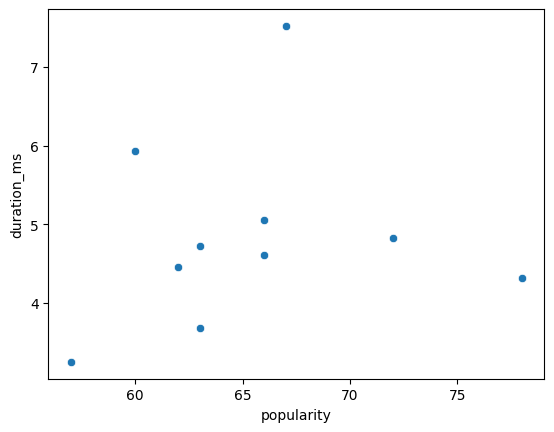

In [7]:
import seaborn as sns

compare_plot = sns.scatterplot(data = top_songs_df, x = "popularity", y = "duration_ms")
figure = compare_plot.get_figure()
figure.savefig("scatter_plot.png")